In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.impute import SimpleImputer
from datetime import datetime
import joblib

In [2]:
df=pd.read_csv('dataset/master/GUIDE_Train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [4]:
df.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [5]:
num_cols = df._get_numeric_data().columns

In [6]:
num_cols

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City'],
      dtype='object')

In [7]:
cat_cols = []

In [8]:
for col in df.columns:
    if col not in num_cols:
        cat_cols += [col]

In [9]:
cat_cols

['Timestamp',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'ThreatFamily',
 'ResourceType',
 'Roles',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict']

In [10]:
def desc_na(data):
    total=data.isnull().sum().sort_values(ascending=False)
    percent=(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [11]:
desc_na(df)

,Total,Percent
ResourceType,9509762,99.925658
ActionGrouped,9460773,99.410897
ActionGranular,9460773,99.410897
ThreatFamily,9441956,99.213173
EmailClusterId,9420025,98.982729
AntispamDirection,9339535,98.136965
Roles,9298686,97.707736
SuspicionLevel,8072708,84.825536
LastVerdict,7282572,76.523030
MitreTechniques,5468386,57.460120


In [12]:
def process_timestamp(date_str):
    timestamp = datetime.strptime(date_str , "%Y-%m-%dT%H:%M:%S.%fZ")
    hour = timestamp.hour
    if hour < 6:
        return "Night"  # Night
    elif hour < 12:
        return 'Morning'  # Morning
    elif hour < 18:
        return 'Afternoon'  # Afternoon
    else:
        return 'Evening' # Evening

In [13]:
df['Timestamp']=df['Timestamp'].apply(process_timestamp)

<function matplotlib.pyplot.show(close=None, block=None)>

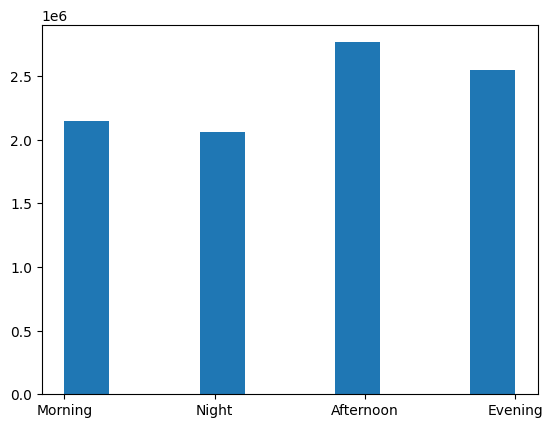

In [14]:
plt.hist(x=df['Timestamp'])
plt.show

In [15]:
def label_encoding(df):
    lable_encoder =LabelEncoder()
    cat_column =[x for x in df.columns if df[x].dtype == 'O'] 
    encod_dict = {}
    for col in cat_column:
       
        df[col] = lable_encoder.fit_transform(df[col])
        label_mapping = dict(zip(lable_encoder.classes_, range(len(lable_encoder.classes_))))
        encod_dict[col] = label_mapping

In [16]:
label_encoding(df)

In [17]:
df.dtypes

Id                      int64
OrgId                   int64
IncidentId              int64
AlertId                 int64
Timestamp               int64
DetectorId              int64
AlertTitle              int64
Category                int64
MitreTechniques         int64
IncidentGrade           int64
ActionGrouped           int64
ActionGranular          int64
EntityType              int64
EvidenceRole            int64
DeviceId                int64
Sha256                  int64
IpAddress               int64
Url                     int64
AccountSid              int64
AccountUpn              int64
AccountObjectId         int64
AccountName             int64
DeviceName              int64
NetworkMessageId        int64
EmailClusterId        float64
RegistryKey             int64
RegistryValueName       int64
RegistryValueData       int64
ApplicationId           int64
ApplicationName         int64
OAuthApplicationId      int64
ThreatFamily            int64
FileName                int64
FolderPath

In [18]:
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Debugging information
        print(f"Column: {col}")
        print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        
        # Check for detected outliers
        if outliers[col]:
            print(f"Outliers in {col}: {outliers[col]}")
        else:
            print(f"No outliers detected in {col}")
    
    return outliers

## Scaling

In [19]:
y=df['IncidentGrade']
df.drop(columns=['IncidentGrade'],axis=1,inplace=True)

In [20]:
scalar = StandardScaler()
scaled_df = scalar.fit_transform(df)

In [21]:
scalar.get_feature_names_out()

array(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'ActionGrouped',
       'ActionGranular', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict',
       'CountryCode', 'State', 'City'], dtype=object)

In [22]:
joblib.dump(scalar, "scaler.pkl")

['scaler.pkl']